### 一、判别分析和降维

- $X,Y,W$ 都是按列排列的，即每一列是一个样本，则投影关系为： $Y = W^T X$

- LDA 通过求解广义特征值问题 $S_bW=\lambda S_wW$（令分母为$I$）, 然后取前d个最大特征值对应的特征向量以列向量组成W，实现降维。
  
- LDA 缺点：
  - 当特征数大于样本数时，类内散度矩阵$S_w$不可逆，对此用MMC可以解决。
  - 离群值对投影矩阵有很大的影响，异常值敏感。

- 找原始算法的缺点可以看这个算法的改进是怎么样的就知道对应的缺点了。


- MMC 是求解的问题是 $\max tr[W^T(S_b-S_w)W], W^TW=I$，避免了小样本内类散度不可逆的问题。

- PCA在提取最具判别力的特征方面效果不佳，而LDA由于小样本问题而不稳定。

- MMC中，当 $\mathbf{W}$ 由 $\mathbf{S}_b-\mathbf{S}_w$ 的前 $d$ 个最大特征向量组成时，$J(\mathbf{W})$ 达到最大化。从而不需要计算 $\mathbf{S}_w$ 的逆，从而可以轻松避免小样本问题。

- inexact ALM（不精确增广拉格朗日乘子法） 是一种求解凸优化问题的方法，以RPCA为例，需要考虑升维：
  - $$\min_{\mathbf{D}, \mathbf{E}} \|\mathbf{D}\|_{*} + \lambda \|\mathbf{E}\|_{1-2} \quad \text{subject to} \quad \mathbf{X} = \mathbf{D} + \mathbf{E}.$$
  - 对应的拉格朗日项是：$$\lambda\|\mathbf{E}\|_{1-2}+\frac\mu2\|\mathbf{X}-\mathbf{D}-\mathbf{E}\|_F^2$$

- 对于$Ax=\lambda w$，如是最大化就对应最大特征值，如是最小化就对应最小特征值。



### 二、流形学习

- LPP是线性降维，LEE和LE是非线性降维。

- LLE 是无监督非线性降维算法, 基于每个点可以用相邻的点线性表示，因此数据稀疏时效果不好。

- Isomap 的算法步骤：
  1. 找K个近邻点，构建邻接图，用弗洛伊德算法算出测地距离
  2. 根据距离构造矩阵，用MDS
   
- Isomap 缺点：
  - 参数选取敏感，依赖于K值
  - 不能学习闭合流形结构，若两端距离近可能导致测地距离计算错误

- **MDS和Isomap的关系**:
  - **关系**：Isomap是根据参数确定邻近图，用的是最短路径距离构建的图，然后用MDS降维。
  - **Isomap缺点**：分布敏感，噪声敏感（短路错误），参数敏感（$K$、$\epsilon$值）。
  - **MDS步骤**：MDS是根据距离矩阵，用特征值分解降维。
      $$ B = -\frac{1}{2} H D_G^2 H $$
      $$ H = I - \frac{1}{n} \mathbf{1} \mathbf{1}^T $$
      $$ B = V \Lambda V^T $$
      $$ Y = V_d \Lambda_d^{1/2} $$

- **LE、LEE、LPP、NPE、LDE 的联系和区别**：
  - LE和LEE分别是基于拉普拉斯和高斯核亲和矩阵的降维方法，加上$y=w^Tx$就分别变成了LPP和NPE。
  - LDE是特色结合LDA和LPP的方法，是一种有监督的降维方法。


- 标准LPP，阈值趋于正无穷时，等价于PCA
  - 推导的注意事项：
    令 $ \bf {E} = \bf{11}^T $，$ \bf{E}$具有以下性质：
    $$\mathbf{E}_n = \frac1n\mathbf{E}_n\mathbf{E}_n$$
    而协方差矩阵$\bf S$可以表示为：
    $$\mathbf{S}  = \mathbf{X}(\mathbf{I}-\frac{\mathbf{E}^2_n}{n^2})\mathbf{X}^T  =\mathbf{X}(\mathbf{I}-\frac{\mathbf{E}_n}{n})\mathbf{X}^T $$

- LE中，虑约束条件 $Y^T D Y = I$，这个约束条件在优化问题中是用于避免退化解。

- $AX=\Lambda X$ 等效于$Ax_i=\lambda_ix_i$，其中$A$是拉普拉斯矩阵，$x_i$是特征向量，$\lambda_i$是对应的特征值，矩阵$\Lambda$满足$$\Lambda = \text{diag}(\lambda_1, \lambda_2, \cdots, \lambda_n)$$

- LPP是和LE类似的算法，都是构建图邻接矩阵$W$的，用拉普拉斯矩阵$L$来降维；但LLE是用线性重构误差最小来构建矩阵$W$的。

- **LE和LLE的比较**：
  -  **LE** (拉普拉斯特征映射) ：
  
     - LE求解是用高维的$x$算出$W_{i,j}$，用这个$W$再构建$y$的目标函数，然后直接求降维后的$y$。
       - 具体是根据优化目标函数$W_{ij} = \begin{cases} \exp(-\frac{\|x_i - x_j\|^2}{2\sigma^2}) & \text{if } \|x_i - x_j\| < \epsilon
        \\ 0 & \text{, else} \end{cases}$来构建$W$。
     
     - 目标函数令相似性权重大的点在降维后的空间中距离尽可能地小。

     - 近邻方式是$\epsilon$-邻域，即找到与样本点距离小于$\epsilon$的点。
     
      - LE (拉普拉斯特征映射) 目标函数形式：
         $$\min \sum_{i,j} W_{i,j} \|y_i-y_j\|^2$$
      - 最终求解是求广义特征值问题$$(D-W)Y=\Lambda DY$$
         
  - **LLE** (局部线性嵌入) :
  
    - LLE 求解<mark>也</mark>是用高维的$x$算出$W_{i,j}$，用这个$W$再构建$y$的目标函数，然后直接求降维后的$y$。
      - 具体是根据优化目标函数$\min \sum_{i} \|x_i-\sum_{j} W_{i,j}x_j\|^2$，来构建出$W$。

    - 目标函数令是样本点的线性重构的误差最小。

    - 近邻方式是$K$-近邻，即找到与样本点最近的$K$个点。
    
      - LLE (局部线性嵌入) 目标函数形式：$$\min_Y \sum_{i} \|y_i-\sum_{j} W_{i,j}y_j\|^2= \text{Tr} \left[ (Y - WY)^T (Y - WY) \right]$$ 其中$Y$是$N×d$的降维后的数据矩阵。
      - 最终求解是求广义特征值问题$$(I-W)^T(I-W)Y=\Lambda Y$$


### 三、回归


- 线性回归正则项中，L1的解是稀疏的，L2的解是稠密的
  
- L2,1 是指矩阵每一行的L2范数之和，代替 L2 可以增强鲁棒性

- 最小化 L2,1 正则项可以得到稀疏解，因为它会使得每一行的L2范数为0，因此其鲁棒性是来源于稀疏性而不是对异常值的鲁棒性

- 用**L2,1**正则，可以确保**稀疏性**以及对**离群值**的鲁棒性。


- 小类问题，特征最多为$c$，也就是样本数小于特征数的情况，这时可以用L2,1正则化，因为它可以保证每个类别的特征都是稀疏的，但是要注意这时候的类别矩阵$Y$是按行排列的，也就是$n×c$大小的，而且可以增强对离群值的鲁棒性。
  
- LDA，岭回归等，都忽略了局部几何结构

### 四、SVM

- 核函数并不直接执行从输入空间到高维空间的映射，而是提供了一种方法来计算在高维特征空间中的两个样本点的内积，而无需显式地执行这个映射

### 五、聚类



### 四、神经网络

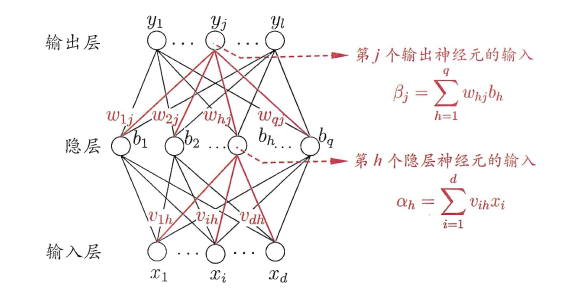

- 注意链式求导（对损失函数关于权重来求导），且梯度下降公式是 $x_{t+1}=x_t - \eta \nabla f(x_t)$

- 由$L$关于$w_i^{(t)}$求导，需要对由$w_i^{(t)}$到$L$的路径上的所有节点的链式求导(由多条分支则相加)，即反向传播

- sigmoid函数：$Sigmoid(x) = (1+e^{-x})^{-1}$，其导数是 $f'(x)=f(x)(1-f(x))$